# Part 3 : Exploratory Data Analysis (EDA)

### We will explore the data scrapped from glassdoor using various visualization and stats

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,job_state,same_state,age_company,python_yn,r_yn,spark_yn,aws_yn,sql_yn,excel_yn
0,Data Scientist,$70K-$116K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,93.0,VA,0,52,0,0,0,0,1,0
1,Sr Data Scientist,$70K-$116K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,93.0,NY,1,27,0,0,0,1,0,0
2,Senior Data Engineer,$70K-$116K (Glassdoor est.),Summary The Senior Data Engineer is a key posi...,-1.0,RE Insight,"Irvine, CA","Irvine, CA",1 to 50 employees,2018,Company - Private,...,93.0,CA,1,2,1,0,1,0,1,1
3,Data Scientist,$70K-$116K (Glassdoor est.),The Senior Data Scientist will build and impro...,3.7,Powertek\n,"Washington, DC","Rockville, MD",51 to 200 employees,2001,Company - Private,...,93.0,DC,0,19,0,0,0,0,0,0
4,Data Scientist,$70K-$116K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,...,93.0,OH,0,53,1,0,0,0,0,0


In [4]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'job_state', 'same_state',
       'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn',
       'excel_yn'],
      dtype='object')

## Before doing EDA, we need to fix few columns.
1. Fix Job Title
2. Fix job title with seniority
3. Fix job state like United States, Remote, New Jersey
4. Fix Job Description Length
5. Fix Competitors count
6. Fix "\n" in Company Name column

### Fix Job title

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [6]:
data['job_simple'] = data['Job Title'].apply(title_simplifier)
data['job_simple'].value_counts()

data scientist    747
na                130
data engineer      53
analyst            48
mle                11
manager             7
director            4
Name: job_simple, dtype: int64

 ### Fix job title with seniority

In [7]:
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'prinicipal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [8]:
data['job_seniority'] = data['Job Title'].apply(seniority)
data['job_seniority'].value_counts()

na        870
senior    130
Name: job_seniority, dtype: int64

### Fix job state like United States, Remote, New Jersey

We can see there are states names like United States which we are trying to fix

In [9]:
data.job_state.value_counts() 

 CA              220
 VA              114
 MA              100
 NY               87
 TX               56
 IL               46
 PA               34
 MD               25
 NC               25
 OH               22
 AZ               17
 MO               17
 WI               17
 GA               16
 WA               16
 MI               13
United States     12
 NJ               11
Remote            11
 FL               11
 IN               11
 CO               11
 DC               11
 UT               10
 AL                9
 OR                8
 MN                8
 SC                6
 CT                5
 NE                5
 HI                5
 KS                4
 NH                4
 IA                4
 TN                4
Utah               4
 RI                3
 OK                3
 KY                3
 AR                2
 MS                2
 AK                2
 LA                1
 DE                1
 PR                1
California         1
 NV                1
New Jersey   

In [10]:
data['job_state'] = data['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'united states' else 'NY')
data['job_state'] = data['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'remote' else 'NY')
data['job_state'] = data['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'utah' else 'CA')
data['job_state'] = data['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'new jersey' else 'NJ')
data['job_state'] = data['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'california' else 'CA')

In [11]:
data.job_state.value_counts() 

CA    225
VA    114
NY    110
MA    100
TX     56
IL     46
PA     34
MD     25
NC     25
OH     22
AZ     17
WI     17
MO     17
GA     16
WA     16
MI     13
NJ     12
CO     11
FL     11
IN     11
DC     11
UT     10
AL      9
OR      8
MN      8
SC      6
HI      5
CT      5
NE      5
KS      4
TN      4
IA      4
NH      4
OK      3
KY      3
RI      3
AK      2
AR      2
MS      2
NV      1
DE      1
LA      1
PR      1
Name: job_state, dtype: int64

### Job Description Length

In [12]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'job_state', 'same_state',
       'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn',
       'excel_yn', 'job_simple', 'job_seniority'],
      dtype='object')

In [13]:
data['job_desc_length'] = data['Job Description'].apply(lambda x : len(x))

In [14]:
max(data['job_desc_length']), min(data['job_desc_length'])

(18555, 71)

### Competitors count

In [15]:
data['Competitors']

0                                              -1
1         EmblemHealth, UnitedHealth Group, Aetna
2                                              -1
3                                              -1
4                                              -1
                          ...                    
995                                            -1
996                                            -1
997                    Pfizer, AstraZeneca, Merck
998                                            -1
999    Adecco, ManpowerGroup, Allegis Corporation
Name: Competitors, Length: 1000, dtype: object

In [16]:
data['Number_Competitors'] = data['Competitors'].apply(lambda x : len(x.split(',')) if x!='-1' else 0)

In [17]:
data[['Competitors','Number_Competitors']]

,Competitors,Number_Competitors
0,-1,0
1,"EmblemHealth, UnitedHealth Group, Aetna",3
2,-1,0
3,-1,0
4,-1,0
...,...,...
995,-1,0
996,-1,0
997,"Pfizer, AstraZeneca, Merck",3
998,-1,0


### Remove \n in Company Name column

In [18]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'job_state', 'same_state',
       'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn',
       'excel_yn', 'job_simple', 'job_seniority', 'job_desc_length',
       'Number_Competitors'],
      dtype='object')

In [19]:
data['Company Name']

0                                 ManTech\n
1                             Healthfirst\n
2                                RE Insight
3                                Powertek\n
4            Riverside Research Institute\n
                       ...                 
995                                  CompIQ
996    Visiting Nurse Service of New York\n
997                                   GSK\n
998             Cloudbigdata Technologies\n
999                                 Kelly\n
Name: Company Name, Length: 1000, dtype: object

In [20]:
data['Company Name'] = data['Company Name'].apply(lambda x : x.replace('\n',''))

In [21]:
data['Company Name'] 

0                                 ManTech
1                             Healthfirst
2                              RE Insight
3                                Powertek
4            Riverside Research Institute
                      ...                
995                                CompIQ
996    Visiting Nurse Service of New York
997                                   GSK
998             Cloudbigdata Technologies
999                                 Kelly
Name: Company Name, Length: 1000, dtype: object

### Lets do EDA now !

In [22]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,r_yn,spark_yn,aws_yn,sql_yn,excel_yn,job_simple,job_seniority,job_desc_length,Number_Competitors
0,Data Scientist,$70K-$116K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,0,0,0,1,0,data scientist,na,4076,0
1,Sr Data Scientist,$70K-$116K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,0,0,0,1,0,0,data scientist,senior,3389,3
2,Senior Data Engineer,$70K-$116K (Glassdoor est.),Summary The Senior Data Engineer is a key posi...,-1.0,RE Insight,"Irvine, CA","Irvine, CA",1 to 50 employees,2018,Company - Private,...,1,0,1,0,1,1,data engineer,senior,3062,0
3,Data Scientist,$70K-$116K (Glassdoor est.),The Senior Data Scientist will build and impro...,3.7,Powertek,"Washington, DC","Rockville, MD",51 to 200 employees,2001,Company - Private,...,0,0,0,0,0,0,data scientist,na,399,0
4,Data Scientist,$70K-$116K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,1967,Nonprofit Organization,...,1,0,0,0,0,0,data scientist,na,4062,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           1000 non-null   object 
 1   Salary Estimate     1000 non-null   object 
 2   Job Description     1000 non-null   object 
 3   Rating              1000 non-null   float64
 4   Company Name        1000 non-null   object 
 5   Location            1000 non-null   object 
 6   Headquarters        1000 non-null   object 
 7   Size                1000 non-null   object 
 8   Founded             1000 non-null   int64  
 9   Type of ownership   1000 non-null   object 
 10  Industry            1000 non-null   object 
 11  Sector              1000 non-null   object 
 12  Revenue             1000 non-null   object 
 13  Competitors         1000 non-null   object 
 14  min_salary          1000 non-null   int64  
 15  max_salary          1000 non-null   int64  
 16  average

In [24]:
#These are the continous variable via 3 methods
data.describe().columns

Index(['Rating', 'Founded', 'min_salary', 'max_salary', 'average_salary',
       'same_state', 'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn',
       'sql_yn', 'excel_yn', 'job_desc_length', 'Number_Competitors'],
      dtype='object')

In [25]:
num_var = data.select_dtypes(np.number)
num_var.columns

Index(['Rating', 'Founded', 'min_salary', 'max_salary', 'average_salary',
       'same_state', 'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn',
       'sql_yn', 'excel_yn', 'job_desc_length', 'Number_Competitors'],
      dtype='object')

In [26]:
data._get_numeric_data().columns

Index(['Rating', 'Founded', 'min_salary', 'max_salary', 'average_salary',
       'same_state', 'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn',
       'sql_yn', 'excel_yn', 'job_desc_length', 'Number_Competitors'],
      dtype='object')

In [27]:
data.describe().columns

Index(['Rating', 'Founded', 'min_salary', 'max_salary', 'average_salary',
       'same_state', 'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn',
       'sql_yn', 'excel_yn', 'job_desc_length', 'Number_Competitors'],
      dtype='object')

In [28]:
#Categorical variables
data.select_dtypes(object).columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'job_state', 'job_simple',
       'job_seniority'],
      dtype='object')

In [29]:
data.describe()

,Rating,Founded,min_salary,max_salary,average_salary,same_state,age_company,python_yn,r_yn,spark_yn,aws_yn,sql_yn,excel_yn,job_desc_length,Number_Competitors
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.427000,1596.477000,100.543000,152.467000,126.5050,0.413000,33.27700,0.705000,0.002000,0.26400,0.240000,0.547000,0.418000,3424.764000,0.723000
std,1.468519,782.845011,26.196687,35.582735,29.7572,0.492619,46.93742,0.456271,0.044699,0.44102,0.427297,0.498035,0.493477,1693.763408,1.231986
min,-1.000000,-1.000000,52.000000,91.000000,71.5000,0.000000,-1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,71.000000,0.000000
25%,3.300000,1883.750000,80.000000,118.000000,104.5000,0.000000,5.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2244.500000,0.000000
50%,3.700000,1989.500000,96.000000,147.000000,123.5000,0.000000,16.00000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,3332.500000,0.000000
75%,4.200000,2008.000000,123.000000,178.000000,154.0000,1.000000,40.00000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,4386.250000,2.000000
max,5.000000,2019.000000,148.000000,222.000000,181.5000,1.000000,338.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,18555.000000,3.000000


In [30]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'job_state', 'same_state',
       'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn',
       'excel_yn', 'job_simple', 'job_seniority', 'job_desc_length',
       'Number_Competitors'],
      dtype='object')

## Explore continous variable

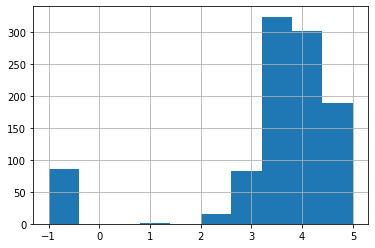

In [31]:
data.Rating.hist()

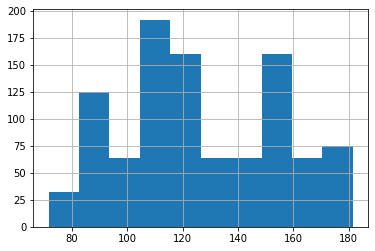

In [32]:
data['average_salary'].hist()

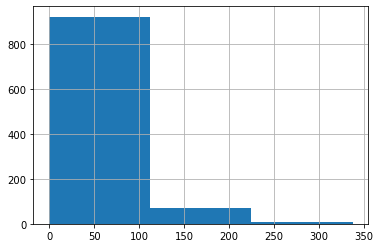

In [33]:
data['age_company'].hist(bins=3)

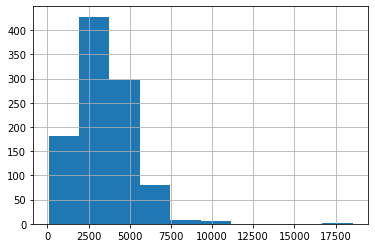

In [34]:
data['job_desc_length'].hist()

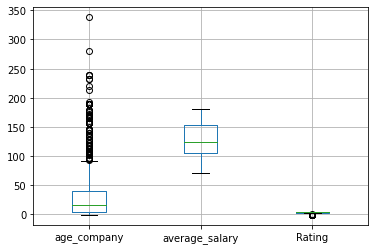

In [35]:
data.boxplot(column = ['age_company','average_salary','Rating'])

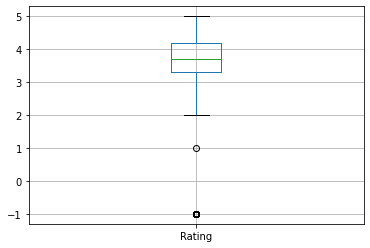

In [36]:
data.boxplot(column='Rating')

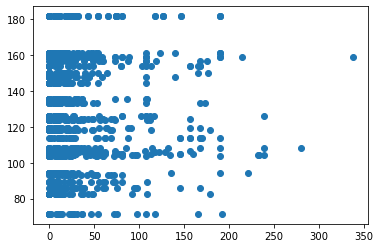

In [37]:
plt.scatter(data['age_company'],data['average_salary'])

In [38]:
corr= data[['age_company','average_salary','Rating','job_desc_length','Number_Competitors']].corr()
corr

,age_company,average_salary,Rating,job_desc_length,Number_Competitors
age_company,1.000000,0.011602,0.143225,0.349418,0.295589
average_salary,0.011602,1.000000,-0.051528,-0.020693,0.045582
Rating,0.143225,-0.051528,1.000000,0.110369,0.116400
job_desc_length,0.349418,-0.020693,0.110369,1.000000,0.206702
Number_Competitors,0.295589,0.045582,0.116400,0.206702,1.000000


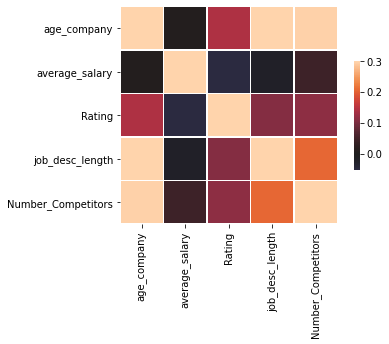

In [39]:
sns.heatmap(corr,   vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'job_state', 'same_state',
       'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn',
       'excel_yn', 'job_simple', 'job_seniority', 'job_desc_length',
       'Number_Competitors'],
      dtype='object')

In [41]:
cat = data.select_dtypes(object).columns
cat_var = data[cat]
cat_var

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,job_state,job_simple,job_seniority
0,Data Scientist,$70K-$116K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,VA,data scientist,na
1,Sr Data Scientist,$70K-$116K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",NY,data scientist,senior
2,Senior Data Engineer,$70K-$116K (Glassdoor est.),Summary The Senior Data Engineer is a key posi...,RE Insight,"Irvine, CA","Irvine, CA",1 to 50 employees,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1,CA,data engineer,senior
3,Data Scientist,$70K-$116K (Glassdoor est.),The Senior Data Scientist will build and impro...,Powertek,"Washington, DC","Rockville, MD",51 to 200 employees,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,DC,data scientist,na
4,Data Scientist,$70K-$116K (Glassdoor est.),Returning Candidate? Log back in to the Career...,Riverside Research Institute,"Beavercreek, OH","Arlington, VA",501 to 1000 employees,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1,OH,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Data Scientist,$141K-$222K (Glassdoor est.),YOUR ROLE\n\nCompIQ is building a future where...,CompIQ,"New York, NY","New York, NY",1 to 50 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,NY,data scientist,na
996,Data Scientist,$141K-$222K (Glassdoor est.),Responsibilities\n\nAbout Our Team:\n\nThe Dat...,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,NY,data scientist,na
997,"Development Scientist, Voltaren",$141K-$222K (Glassdoor est.),Site Name: Richmond Sherwood\nPosted Date: Mar...,GSK,"Richmond, VA","Brentford, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",VA,na,na
998,Entry level Data Scientist,$141K-$222K (Glassdoor est.),Job Description\nCompany Description\n\nOur co...,Cloudbigdata Technologies,"Dallas, TX","Dallas, TX",1001 to 5000 employees,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,TX,data scientist,na


In [42]:
for i in cat_var.columns:
    print_col = []
    cat_num = cat_var[i].value_counts()
    if(len(cat_num)<=25):
        print("Graph for %s = %d" % (i,len(cat_num)))
        print(i)

Graph for Size = 9
Size
Graph for Type of ownership = 13
Type of ownership
Graph for Sector = 23
Sector
Graph for Revenue = 14
Revenue
Graph for job_simple = 7
job_simple
Graph for job_seniority = 2
job_seniority


Graph for Size = 9


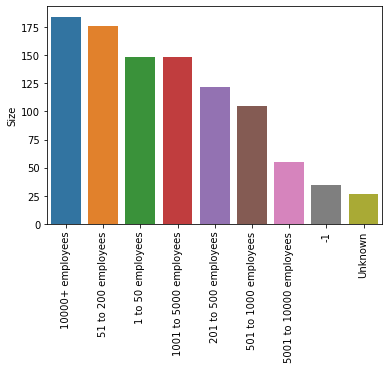

Graph for Type of ownership = 13


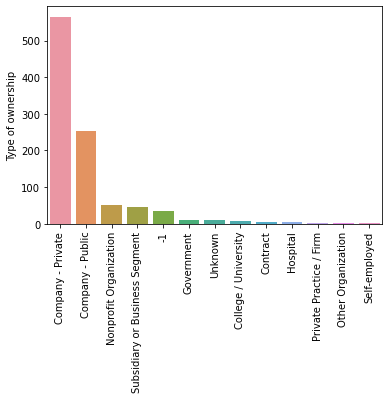

Graph for Sector = 23


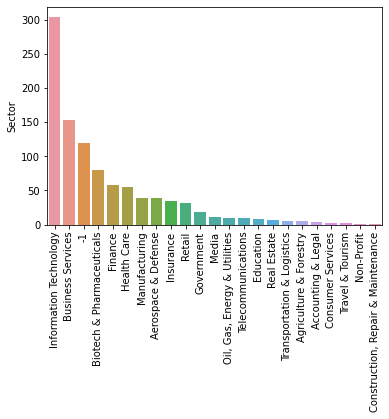

Graph for Revenue = 14


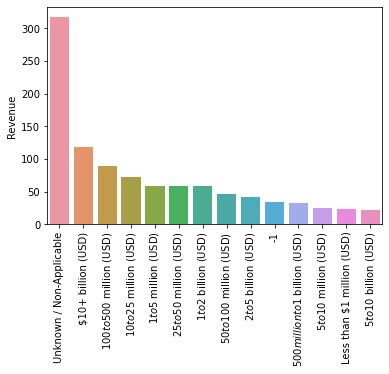

Graph for job_simple = 7


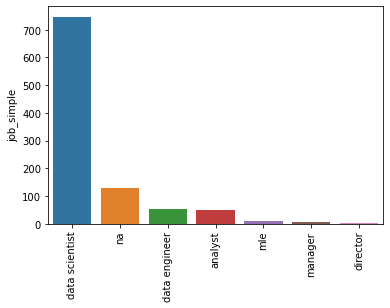

Graph for job_seniority = 2


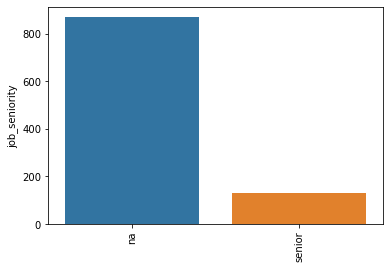

In [43]:
for i in cat_var[['Size','Type of ownership','Sector','Revenue','job_simple','job_seniority']].columns:
    cat_num = cat_var[i].value_counts()
    print("Graph for %s = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [44]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'job_state', 'same_state',
       'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn',
       'excel_yn', 'job_simple', 'job_seniority', 'job_desc_length',
       'Number_Competitors'],
      dtype='object')

In [45]:
pd.pivot_table(data,index='job_simple',values='average_salary')

,average_salary
job_simple,
analyst,124.312500
data engineer,119.924528
data scientist,127.894913
director,115.875000
manager,119.214286
mle,118.136364
na,123.438462


In [46]:
pd.pivot_table(data,index=['job_simple','job_seniority'],values='average_salary')

average_salary
job_simple     job_seniority                
analyst        na                 125.632353
               senior             121.107143
data engineer  na                 121.694444
               senior             116.176471
data scientist na                 127.965843
               senior             127.067797
director       na                 124.666667
               senior              89.500000
manager        na                 121.583333
               senior             105.000000
mle            na                 120.550000
               senior              94.000000
na             na                 123.225806
               senior             123.972973

In [47]:
pd.set_option('display.max_rows',120)
pd.pivot_table(data,index=['job_state','job_simple'],values='average_salary',aggfunc='count').sort_values('job_state',ascending=False)

average_salary
job_state job_simple                    
WI        na                           4
          data scientist              11
          analyst                      2
WA        na                           1
          data scientist              12
          data engineer                2
          analyst                      1
VA        na                          12
          director                     1
          data scientist              94
          data engineer                5
          analyst                      2
UT        data engineer                1
          analyst                      1
          data scientist               6
          manager                      1
          na                           1
TX        na                           2
          data scientist              49
          data engineer                4
          analyst                      1
TN        data scientist               4
SC        na                           1
          data scientist               2
          analyst                      3
RI        data scientist               2
          analyst                      1
PR        data scientist               1
PA        data scientist              23
          analyst                      2
          data engineer                2
          na                           5
          mle                          2
OR        data scientist               8
OK        na                           1
          data scientist               2
OH        na                           5
          data scientist              16
          data engineer                1
NY        manager                      1
          data engineer                7
          data scientist              95
          analyst                      3
          mle                          1
          na                           3
NV        data scientist               1
NJ        data scientist              10
          data engineer                1
          analyst                      1
NH        na                           2
          data scientist               2
NE        na                           1
          data scientist               4
NC        analyst                      1
          na                           7
          manager                      1
          data scientist              15
          data engineer                1
MS        na                           2
MO        na                           2
          data scientist              13
          data engineer                2
MN        data scientist               8
MI        data scientist              12
          data engineer                1
MD        na                           2
          data scientist              20
          data engineer                2
          analyst                      1
MA        data scientist              52
          analyst                      4
          data engineer                4
          director                     3
          na                          37
LA        data scientist               1
KY        data scientist               3
KS        data scientist               4
IN        na                           2
          data scientist               5
          data engineer                2
          analyst                      2
IL        na                           5
          data scientist              35
          data engineer                5
          analyst                      1
IA        analyst                      1
          na                           3
HI        data scientist               5
GA        na                           2
          data scientist              14
FL        na                           2
          manager                      1
          data scientist               5
          analyst                      3
DE        na                           1
DC        data scientist              10
        

In [48]:
pd.pivot_table(data[data.job_simple == 'data scientist'],index=['job_state','job_simple'],values='average_salary').sort_values('average_salary',ascending=False)

,,average_salary
job_state,job_simple,
AK,data scientist,154.250000
HI,data scientist,150.400000
GA,data scientist,149.464286
KS,data scientist,148.875000
NV,data scientist,144.500000
OR,data scientist,138.937500
TX,data scientist,135.091837
OH,data scientist,134.375000
VA,data scientist,134.106383


In [49]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'job_state', 'same_state',
       'age_company', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn',
       'excel_yn', 'job_simple', 'job_seniority', 'job_desc_length',
       'Number_Competitors'],
      dtype='object')

In [50]:
# rating, industry, sector, revenue, competitors, age_company, python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn','excel_yn'

In [51]:
data_pivot= data[['Rating','Industry','Sector','Revenue', 'Competitors','age_company','Type of ownership','python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'sql_yn','excel_yn','average_salary']]

In [52]:
data_pivot

,Rating,Industry,Sector,Revenue,Competitors,age_company,Type of ownership,python_yn,r_yn,spark_yn,aws_yn,sql_yn,excel_yn,average_salary
0,4.2,Research & Development,Business Services,$1 to $2 billion (USD),-1,52,Company - Public,0,0,0,0,1,0,93.0
1,3.1,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",27,Nonprofit Organization,0,0,0,1,0,0,93.0
2,-1.0,IT Services,Information Technology,Unknown / Non-Applicable,-1,2,Company - Private,1,0,1,0,1,1,93.0
3,3.7,IT Services,Information Technology,$25 to $50 million (USD),-1,19,Company - Private,0,0,0,0,0,0,93.0
4,3.6,Federal Agencies,Government,$50 to $100 million (USD),-1,53,Nonprofit Organization,1,0,0,0,0,0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.0,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,5,Company - Private,1,0,0,0,0,0,181.5
996,3.8,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,127,Nonprofit Organization,1,0,0,0,1,1,181.5
997,3.9,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",190,Company - Public,0,0,0,1,0,0,181.5
998,4.7,IT Services,Information Technology,$50 to $100 million (USD),-1,22,Company - Private,1,0,0,0,0,1,181.5


In [100]:
for i in data_pivot.columns:
    print(i)
    print(pd.pivot_table(data_pivot,index=i,values='average_salary').sort_values('average_salary',ascending=False))

Rating
        average_salary
Rating                
 2.0        150.000000
 2.8        145.250000
 2.2        142.750000
 2.3        140.500000
 2.9        136.400000
 3.8        135.315789
 4.1        134.737500
 3.4        131.308333
 2.5        130.250000
 4.9        129.944444
-1.0        129.182353
 3.6        128.585526
 4.0        127.985075
 3.0        127.625000
 3.5        126.509259
 3.7        126.352459
 3.2        125.714286
 3.9        124.875000
 2.7        124.500000
 3.1        123.250000
 4.7        122.796296
 4.3        122.267857
 5.0        121.970588
 4.2        121.526316
 4.5        120.942857
 4.6        120.541667
 2.6        119.350000
 4.8        118.250000
 3.3        117.700000
 4.4        116.804348
 1.0        106.500000
 2.4         86.000000
Industry
                                          average_salary
Industry                                                
Beauty & Personal Accessories Stores          160.833333
Cable, Internet & Telephone Pro

ValueError: Grouper for 'average_salary' not 1-dimensional

In [98]:
pd.pivot_table(data,index='Revenue',columns='python_yn',values='average_salary',aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),14,44
$1 to $5 million (USD),17,42
$10 to $25 million (USD),22,51
$10+ billion (USD),47,72
$100 to $500 million (USD),30,60
$2 to $5 billion (USD),13,29
$25 to $50 million (USD),16,42
$5 to $10 billion (USD),5,17
$5 to $10 million (USD),9,16


## Wordcloud on Job Description 

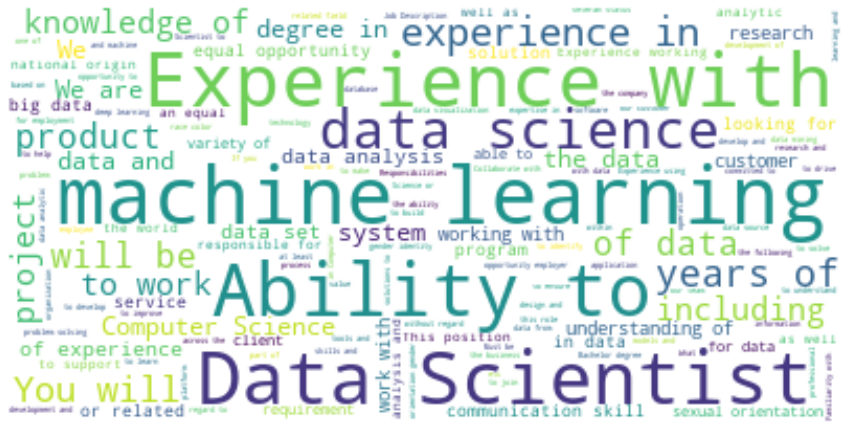

In [93]:
from wordcloud import WordCloud

txt = " ".join([str(x) for x in data['Job Description'].values])
wc = WordCloud(background_color='white')
wc.generate(txt)
plt.figure(figsize = (15,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()